Import Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import dataset and process data

In [2]:
import nltk
import string
import re
import pandas as pd

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
nltk.download('stopwords')

data = pd.read_csv('/content/drive/MyDrive/kindle_review .csv')


stpwrds = stopwords.words('english')
stpwrds.remove('not')
lemmatizer = WordNetLemmatizer()

    

def textprocessing(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'<.*?>', '', text)
    text = text.lower().strip()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = " ".join([lemmatizer.lemmatize(word) for word in str(text).split() if word not in stpwrds])
    
    return text


data=data.drop(columns=['Unnamed: 0','summary'])
print("\nShape: ",data.shape)
print('\nValue Counts : ')
print(data['rating'].value_counts())

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.

Shape:  (12000, 2)

Value Counts : 
5    3000
4    3000
1    2000
3    2000
2    2000
Name: rating, dtype: int64


In [3]:
data['Processed_Review'] = data['reviewText'].map(textprocessing)
print('\nProcessed data : ')
print(data.head(10))


Processed data : 
   rating                                         reviewText  \
0       5  This book was the very first bookmobile book I...   
1       1  When I read the description for this book, I c...   
2       5  I just had to edit this review. This book is a...   
3       5  I don't normally buy 'mystery' novels because ...   
4       5  This isn't the kind of book I normally read, a...   
5       4  I really enjoyed how this story developed.  It...   
6       3  I bought this book because I loved the cover a...   
7       5  This was a book that I thoroughly enjoyed from...   
8       4  If the first entry into the series was a toddl...   
9       1  I bought this set and returned it.  I couldn't...   

                                    Processed_Review  
0  book first bookmobile book bought school book ...  
1  read description book couldnt wait read downlo...  
2  edit review book believe got right updated rew...  
3  dont normally buy mystery novel dont like howe...  
4

Splitting Dataset

In [21]:
import numpy as np
from sklearn.model_selection import train_test_split

X = np.array(data['Processed_Review'])

y = np.array(data['rating'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print('\n\nShape of Training Data')
print('X_train\ty_train')
print( X_train.shape,y_train.shape)

print('\n\nShape of Testing Data')
print('X_test\ty_test')
print( X_test.shape, y_test.shape)



Shape of Training Data
X_train	y_train
(8400,) (8400,)


Shape of Testing Data
X_test	y_test
(3600,) (3600,)


Count Vectorizer

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

cV = CountVectorizer(ngram_range=(1,1))

cV.fit(X_train)

X_train_CV = cV.transform(X_train)
X_test_CV  = cV.transform(X_test)

print(X_train_CV)

  (0, 3240)	2
  (0, 6572)	1
  (0, 6848)	1
  (0, 8301)	1
  (0, 9197)	1
  (0, 9463)	1
  (0, 9671)	1
  (0, 11239)	1
  (0, 12713)	1
  (0, 15887)	1
  (0, 16044)	1
  (0, 17214)	1
  (0, 17249)	1
  (0, 17536)	1
  (0, 19230)	2
  (0, 19608)	1
  (0, 21342)	1
  (0, 23092)	1
  (0, 23119)	1
  (0, 23405)	1
  (0, 23459)	2
  (0, 26003)	1
  (0, 27974)	1
  (0, 29009)	1
  (0, 29610)	1
  :	:
  (8399, 26030)	2
  (8399, 26392)	1
  (8399, 27434)	1
  (8399, 27852)	1
  (8399, 27974)	1
  (8399, 28577)	1
  (8399, 28622)	1
  (8399, 28846)	1
  (8399, 29040)	1
  (8399, 29435)	1
  (8399, 29507)	1
  (8399, 29739)	1
  (8399, 29809)	1
  (8399, 30513)	1
  (8399, 30675)	1
  (8399, 30753)	1
  (8399, 31374)	1
  (8399, 31918)	1
  (8399, 32371)	1
  (8399, 32727)	4
  (8399, 32943)	1
  (8399, 33048)	1
  (8399, 33049)	1
  (8399, 33078)	2
  (8399, 33191)	1


TF-IDF 

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

tV = TfidfVectorizer(ngram_range=(1, 3))
fitted_tV = tV.fit(X_train)

X_train_tV = fitted_tV.transform(X_train)
X_test_tV  = fitted_tV.transform(X_test)

print(X_train_tV)

  (0, 751707)	0.1240764173696265
  (0, 751706)	0.1240764173696265
  (0, 751699)	0.10948661994886827
  (0, 708417)	0.1240764173696265
  (0, 708414)	0.11190788776691346
  (0, 708264)	0.06823723354997054
  (0, 682630)	0.1240764173696265
  (0, 682629)	0.1240764173696265
  (0, 682616)	0.08902919259524054
  (0, 676932)	0.1240764173696265
  (0, 676931)	0.1240764173696265
  (0, 676919)	0.084292475892904
  (0, 665593)	0.1240764173696265
  (0, 665592)	0.1240764173696265
  (0, 664500)	0.04653081011600734
  (0, 651378)	0.08106610061325907
  (0, 626871)	0.1240764173696265
  (0, 626866)	0.1041019598194465
  (0, 623716)	0.022496413345840564
  (0, 582137)	0.1240764173696265
  (0, 582136)	0.1240764173696265
  (0, 582098)	0.08684721424065803
  (0, 527595)	0.11869175724020475
  (0, 527594)	0.1074394671779135
  (0, 527046)	0.11869175724020475
  :	:
  (8399, 28808)	0.060618804941416166
  (8399, 28740)	0.07289166575769988
  (8399, 25811)	0.060618804941416166
  (8399, 25810)	0.060618804941416166
  (8399, 257

Count Vectorizer Models

Multinomial Naive Bayes

Naive Bayes - Count Vectorizer
Test Set Accuracy : 
47.55555555555556
              precision    recall  f1-score   support

           1       0.59      0.47      0.53       591
           2       0.42      0.38      0.40       634
           3       0.39      0.23      0.29       615
           4       0.39      0.64      0.48       859
           5       0.64      0.56      0.59       901

    accuracy                           0.48      3600
   macro avg       0.49      0.46      0.46      3600
weighted avg       0.49      0.48      0.47      3600



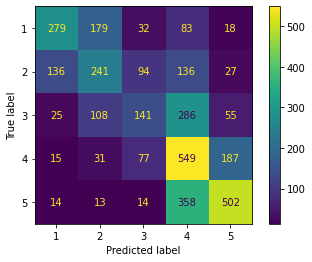

In [7]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

model = MultinomialNB().fit(X_train_CV, y_train)
y_pred = model.predict(X_test_CV)
cf_matrix = confusion_matrix(y_test, y_pred)

print('Naive Bayes - Count Vectorizer')
print("Test Set Accuracy : ")
print(metrics.accuracy_score(y_test, y_pred) * 100)
print(metrics.classification_report(y_test, y_pred))
disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix, display_labels=model.classes_) 
disp.plot()



Logistic Regression

Logistic Regression - Count Vectorizer
Test Set Accuracy : 
47.11111111111111
              precision    recall  f1-score   support

           1       0.53      0.53      0.53       591
           2       0.41      0.38      0.40       634
           3       0.35      0.31      0.33       615
           4       0.42      0.46      0.44       859
           5       0.59      0.62      0.60       901

    accuracy                           0.47      3600
   macro avg       0.46      0.46      0.46      3600
weighted avg       0.47      0.47      0.47      3600



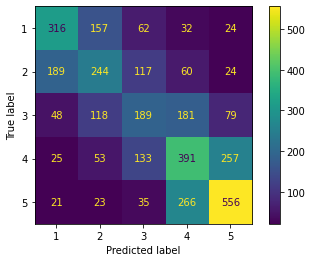

In [8]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=500).fit(X_train_CV, y_train)
y_pred = model.predict(X_test_CV)
cf_matrix = confusion_matrix(y_test, y_pred)

print('Logistic Regression - Count Vectorizer')
print("Test Set Accuracy : ")
print(metrics.accuracy_score(y_test, y_pred) * 100)
print(metrics.classification_report(y_test, y_pred))
disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix, display_labels=model.classes_) 
disp.plot()

Random Forest

Random Forest - Count Vectorizer
Test Set Accuracy : 
44.02777777777778
              precision    recall  f1-score   support

           1       0.47      0.59      0.53       591
           2       0.40      0.20      0.27       634
           3       0.37      0.11      0.17       615
           4       0.37      0.53      0.43       859
           5       0.52      0.65      0.58       901

    accuracy                           0.44      3600
   macro avg       0.43      0.42      0.40      3600
weighted avg       0.43      0.44      0.41      3600



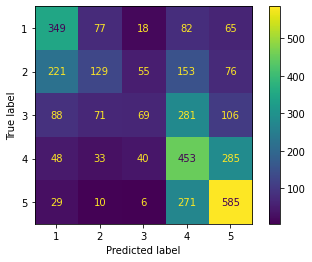

In [9]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier().fit(X_train_CV, y_train)
y_pred = model.predict(X_test_CV)
cf_matrix = confusion_matrix(y_test, y_pred)

print('Random Forest - Count Vectorizer')
print("Test Set Accuracy : ")
print(metrics.accuracy_score(y_test, y_pred) * 100)
print(metrics.classification_report(y_test, y_pred))
disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix, display_labels=model.classes_) 
disp.plot()


LinearSVC

LinearSVC - Count Vectorizer
Test Set Accuracy : 
42.66666666666667
              precision    recall  f1-score   support

           1       0.48      0.49      0.48       591
           2       0.37      0.35      0.36       634
           3       0.29      0.28      0.29       615
           4       0.39      0.41      0.40       859
           5       0.55      0.56      0.56       901

    accuracy                           0.43      3600
   macro avg       0.42      0.42      0.42      3600
weighted avg       0.42      0.43      0.43      3600



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


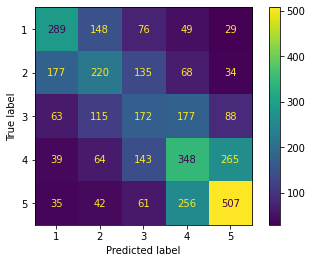

In [10]:
from sklearn.svm import LinearSVC

model = LinearSVC().fit(X_train_CV, y_train)
y_pred = model.predict(X_test_CV)
cf_matrix = confusion_matrix(y_test, y_pred)

print('LinearSVC - Count Vectorizer')
print("Test Set Accuracy : ")
print(metrics.accuracy_score(y_test, y_pred) * 100)
print(metrics.classification_report(y_test, y_pred))
disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix, display_labels=model.classes_) 
disp.plot()


TF-IDF with Models

Multinomial Naive Bayes

Naive Bayes - TF-IDF
Test Set Accuracy : 
34.75
              precision    recall  f1-score   support

           1       0.75      0.18      0.30       591
           2       0.56      0.01      0.03       634
           3       0.50      0.00      0.00       615
           4       0.26      0.86      0.40       859
           5       0.68      0.43      0.53       901

    accuracy                           0.35      3600
   macro avg       0.55      0.30      0.25      3600
weighted avg       0.54      0.35      0.28      3600



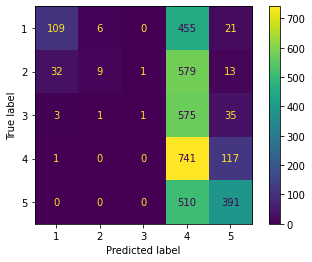

In [12]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay

model = MultinomialNB().fit(X_train_tV, y_train)
y_pred = model.predict(X_test_tV)
cf_matrix = confusion_matrix(y_test, y_pred)

print('Naive Bayes - TF-IDF')
print("Test Set Accuracy : ")
print(metrics.accuracy_score(y_test, y_pred) * 100)
print(metrics.classification_report(y_test, y_pred))
disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix, display_labels=model.classes_) 
disp.plot()


Logistic Regression

Logistic Regression - TF-IDF
Test Set Accuracy : 
50.66666666666667
              precision    recall  f1-score   support

           1       0.58      0.55      0.57       591
           2       0.47      0.40      0.43       634
           3       0.46      0.21      0.29       615
           4       0.42      0.67      0.52       859
           5       0.63      0.61      0.62       901

    accuracy                           0.51      3600
   macro avg       0.51      0.49      0.48      3600
weighted avg       0.52      0.51      0.50      3600



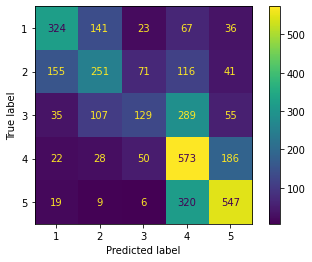

In [13]:
model = LogisticRegression(max_iter=300).fit(X_train_tV, y_train)
y_pred = model.predict(X_test_tV)
cf_matrix = confusion_matrix(y_test, y_pred)

print('Logistic Regression - TF-IDF')
print("Test Set Accuracy : ")
print(metrics.accuracy_score(y_test, y_pred) * 100)
print(metrics.classification_report(y_test, y_pred))
disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix, display_labels=model.classes_) 
disp.plot()

Random Forest

Random Forest - tf-idf Vector
Test Set Accuracy : 
44.138888888888886
              precision    recall  f1-score   support

           1       0.52      0.60      0.56       591
           2       0.47      0.18      0.26       634
           3       0.43      0.07      0.13       615
           4       0.36      0.55      0.43       859
           5       0.48      0.67      0.56       901

    accuracy                           0.44      3600
   macro avg       0.45      0.41      0.39      3600
weighted avg       0.45      0.44      0.40      3600



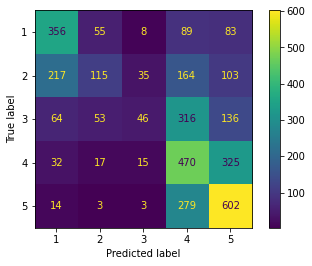

In [14]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier().fit(X_train_tV, y_train)
y_pred=model.predict(X_test_tV)
cf_matrix = confusion_matrix(y_test, y_pred)

print('Random Forest - TF-IDF')
print("Test Set Accuracy : ")
print(metrics.accuracy_score(y_test, y_pred) * 100)
print(metrics.classification_report(y_test, y_pred))
disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix, display_labels=model.classes_) 
disp.plot()

Linear SVC

LinearSVC - TF-IDF
Test Set Accuracy : 
51.63888888888889
              precision    recall  f1-score   support

           1       0.58      0.61      0.60       591
           2       0.47      0.40      0.43       634
           3       0.43      0.27      0.33       615
           4       0.45      0.58      0.51       859
           5       0.62      0.64      0.63       901

    accuracy                           0.52      3600
   macro avg       0.51      0.50      0.50      3600
weighted avg       0.51      0.52      0.51      3600



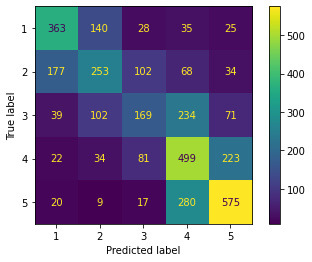

In [15]:
from sklearn.svm import LinearSVC

model = LinearSVC(max_iter=500).fit(X_train_tV, y_train)
y_pred = model.predict(X_test_tV)
cf_matrix = confusion_matrix(y_test, y_pred)

print('LinearSVC - TF-IDF')
print("Test Set Accuracy : ")
print(metrics.accuracy_score(y_test, y_pred) * 100)
print(metrics.classification_report(y_test, y_pred))
disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix, display_labels=model.classes_) 
disp.plot()

Predictions

In [16]:
model = LinearSVC(max_iter=500).fit(X_train_tV, y_train)

In [17]:
new_review = """I really enjoyed reading this novel"""
print(model.predict(fitted_tV.transform([new_review])))

[5]


In [18]:
new_review = """I very much enjoyed this book. It was nearing the end before I figured everything out, and although there were some reveals I had not seen coming, nothing was out of sync with the portrayal of the characters."""
print(model.predict(fitted_tV.transform([new_review])))

[4]


In [20]:
new_review = """There are no words for how much I loathed this book."""
print(model.predict(fitted_tV.transform([new_review])))

[1]


In [22]:
new_review = """ I normally enjoy books by this author but this book felt slow"""
print(model.predict(fitted_tV.transform([new_review])))

[3]
